In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [2]:
data = pd.read_csv('Case2.csv')

In [3]:
data

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_6
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000116,1.000057,1.000004,1.001425,0.999649,1.001650
2,0.999667,0.999739,1.000002,1.002474,0.999308,1.001552
3,1.000070,1.002696,1.000000,1.007441,1.001667,1.002308
4,1.000226,0.999711,1.000005,1.007110,1.001939,0.999043
...,...,...,...,...,...,...
38995,0.923276,0.916493,0.864620,1.326381,1.306602,1.203658
38996,0.924819,0.915893,0.863394,1.332159,1.309065,1.211543
38997,0.924660,0.915980,0.863731,1.335214,1.308361,1.210135
38998,0.923272,0.916770,0.864996,1.337080,1.308208,1.208277


In [4]:
train_data, test_data = train_test_split(data, test_size = 0.2, shuffle = False)

train_data

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_6
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000116,1.000057,1.000004,1.001425,0.999649,1.001650
2,0.999667,0.999739,1.000002,1.002474,0.999308,1.001552
3,1.000070,1.002696,1.000000,1.007441,1.001667,1.002308
4,1.000226,0.999711,1.000005,1.007110,1.001939,0.999043
...,...,...,...,...,...,...
31195,0.987757,0.905361,1.005554,1.274648,1.296547,1.310475
31196,0.986619,0.905063,1.005242,1.276363,1.292891,1.308492
31197,0.987092,0.905517,1.006896,1.277696,1.288240,1.311389
31198,0.985945,0.905057,1.006006,1.282255,1.285269,1.312298


In [19]:
corr_prices = train_data.corr()

corr_prices

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_6
Asset_1,1.000000,0.455087,0.708932,-0.605168,-0.586700,-0.376729
Asset_2,0.455087,1.000000,0.545622,-0.387328,-0.413195,-0.453180
Asset_3,0.708932,0.545622,1.000000,-0.296518,-0.249447,-0.089357
Asset_4,-0.605168,-0.387328,-0.296518,1.000000,0.946948,0.861921
Asset_5,-0.586700,-0.413195,-0.249447,0.946948,1.000000,0.892479
Asset_6,-0.376729,-0.453180,-0.089357,0.861921,0.892479,1.000000


In [5]:
# for col in data.columns:
#     data[f'{col}_log_ret'] = np.log(data[col] / data[col].shift(1))

In [6]:
# # Extract just the log return columns
# log_return_columns = [col for col in train_data.columns if col.endswith('_log_ret')]
# log_return_data = train_data[log_return_columns].dropna()

# # Compute the covariance matrix
# cov_matrix = log_return_data.cov()

# # Display the matrix
# cov_matrix

In [7]:
# corr_matrix = log_return_data.corr()

# corr_matrix

In [25]:
# Number of ticks per day
ticks_per_day = 30

# Compute daily log returns
daily_returns = pd.DataFrame()
for col in train_data.columns:
    start_of_day = train_data[col].iloc[::ticks_per_day].reset_index(drop=True)
    end_of_day = train_data[col].iloc[ticks_per_day - 1::ticks_per_day].reset_index(drop=True)
    daily_returns[f'{col}_daily_log_ret'] = np.log(end_of_day / start_of_day)
    daily_returns[f'{col}_daily_ret'] = end_of_day / start_of_day

# Show the first few rows
daily_returns

,Asset_1_daily_log_ret,Asset_1_daily_ret,Asset_2_daily_log_ret,Asset_2_daily_ret,Asset_3_daily_log_ret,Asset_3_daily_ret,Asset_4_daily_log_ret,Asset_4_daily_ret,Asset_5_daily_log_ret,Asset_5_daily_ret,Asset_6_daily_log_ret,Asset_6_daily_ret
0,0.001374,1.001374,-0.005080,0.994933,-0.000070,0.999930,0.007695,1.007725,0.008089,1.008121,0.010053,1.010104
1,-0.000561,0.999439,-0.001660,0.998341,-0.000328,0.999672,-0.005237,0.994776,0.004909,1.004921,0.008466,1.008502
2,-0.010283,0.989769,-0.006605,0.993417,-0.002765,0.997238,-0.002601,0.997403,0.004843,1.004855,0.003609,1.003615
3,-0.007042,0.992982,-0.005166,0.994847,-0.007192,0.992834,0.009696,1.009743,0.006844,1.006867,0.000233,1.000233
4,-0.003787,0.996220,-0.002870,0.997134,-0.006088,0.993931,-0.000855,0.999146,0.003636,1.003642,0.006991,1.007016
...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.012467,1.012545,0.007510,1.007539,0.007251,1.007277,-0.004461,0.995549,-0.003918,0.996090,-0.004823,0.995189
1036,0.006237,1.006257,0.003743,1.003750,0.009257,1.009300,-0.002682,0.997322,0.006552,1.006573,0.002874,1.002878
1037,-0.003654,0.996353,0.004237,1.004246,0.001446,1.001447,-0.007178,0.992847,-0.002681,0.997323,0.000508,1.000508
1038,-0.012338,0.987737,-0.007703,0.992326,-0.004832,0.995179,-0.011549,0.988518,0.002065,1.002068,-0.004609,0.995401


In [26]:
cov_matrix = daily_returns.cov()

cov_matrix

,Asset_1_daily_log_ret,Asset_1_daily_ret,Asset_2_daily_log_ret,Asset_2_daily_ret,Asset_3_daily_log_ret,Asset_3_daily_ret,Asset_4_daily_log_ret,Asset_4_daily_ret,Asset_5_daily_log_ret,Asset_5_daily_ret,Asset_6_daily_log_ret,Asset_6_daily_ret
Asset_1_daily_log_ret,0.000025,0.000025,0.000018,0.000018,0.000012,0.000012,-0.000011,-0.000011,-0.000012,-0.000012,-0.000011,-0.000011
Asset_1_daily_ret,0.000025,0.000025,0.000018,0.000018,0.000012,0.000012,-0.000011,-0.000011,-0.000012,-0.000012,-0.000011,-0.000011
Asset_2_daily_log_ret,0.000018,0.000018,0.000027,0.000027,0.000015,0.000015,-0.000013,-0.000013,-0.000012,-0.000012,-0.000011,-0.000011
Asset_2_daily_ret,0.000018,0.000018,0.000027,0.000027,0.000015,0.000015,-0.000013,-0.000013,-0.000012,-0.000012,-0.000011,-0.000011
Asset_3_daily_log_ret,0.000012,0.000012,0.000015,0.000015,0.000023,0.000023,-0.000011,-0.000011,-0.000012,-0.000012,-0.000010,-0.000010
Asset_3_daily_ret,0.000012,0.000012,0.000015,0.000015,0.000023,0.000023,-0.000011,-0.000011,-0.000012,-0.000012,-0.000010,-0.000010
Asset_4_daily_log_ret,-0.000011,-0.000011,-0.000013,-0.000013,-0.000011,-0.000011,0.000033,0.000033,0.000021,0.000021,0.000016,0.000016
Asset_4_daily_ret,-0.000011,-0.000011,-0.000013,-0.000013,-0.000011,-0.000011,0.000033,0.000033,0.000021,0.000021,0.000016,0.000016
Asset_5_daily_log_ret,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,0.000021,0.000021,0.000034,0.000034,0.000016,0.000016
Asset_5_daily_ret,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,0.000021,0.000021,0.000034,0.000034,0.000016,0.000016


In [27]:
corr_matrix = daily_returns.corr()

corr_matrix

,Asset_1_daily_log_ret,Asset_1_daily_ret,Asset_2_daily_log_ret,Asset_2_daily_ret,Asset_3_daily_log_ret,Asset_3_daily_ret,Asset_4_daily_log_ret,Asset_4_daily_ret,Asset_5_daily_log_ret,Asset_5_daily_ret,Asset_6_daily_log_ret,Asset_6_daily_ret
Asset_1_daily_log_ret,1.000000,0.999993,0.695489,0.695366,0.490219,0.490208,-0.392502,-0.392597,-0.402830,-0.402639,-0.418921,-0.418647
Asset_1_daily_ret,0.999993,1.000000,0.695458,0.695341,0.490105,0.490097,-0.392558,-0.392651,-0.402923,-0.402730,-0.419113,-0.418838
Asset_2_daily_log_ret,0.695489,0.695458,1.000000,0.999992,0.599392,0.599390,-0.421758,-0.421935,-0.408389,-0.408223,-0.391107,-0.390929
Asset_2_daily_ret,0.695366,0.695341,0.999992,1.000000,0.599352,0.599356,-0.421641,-0.421817,-0.408354,-0.408187,-0.391150,-0.390971
Asset_3_daily_log_ret,0.490219,0.490105,0.599392,0.599352,1.000000,0.999993,-0.410959,-0.410972,-0.415316,-0.415022,-0.388139,-0.388016
Asset_3_daily_ret,0.490208,0.490097,0.599390,0.599356,0.999993,1.000000,-0.410881,-0.410892,-0.415334,-0.415037,-0.388058,-0.387932
Asset_4_daily_log_ret,-0.392502,-0.392558,-0.421758,-0.421641,-0.410959,-0.410881,1.000000,0.999990,0.622660,0.622402,0.507216,0.507110
Asset_4_daily_ret,-0.392597,-0.392651,-0.421935,-0.421817,-0.410972,-0.410892,0.999990,1.000000,0.622540,0.622289,0.507155,0.507055
Asset_5_daily_log_ret,-0.402830,-0.402923,-0.408389,-0.408354,-0.415316,-0.415334,0.622660,0.622540,1.000000,0.999990,0.508664,0.508792
Asset_5_daily_ret,-0.402639,-0.402730,-0.408223,-0.408187,-0.415022,-0.415037,0.622402,0.622289,0.999990,1.000000,0.508706,0.508838


#### What do we have?

1) Most likely, we have 2 groups of assets: 

        Group A (Asset 1, Asset 2, Asset 3)
        Group B (Asset 4, Asset 5, Asset 6)

2) Inside A, strong correlation between each of them (>= 0.5)
Inside B, also strong correlation between each of them (>= 0.5)

3) Each asset in Group A is negatively correlated with each asset in Group B

#### How can we use this feature of the data?

In [11]:
data

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_6
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000116,1.000057,1.000004,1.001425,0.999649,1.001650
2,0.999667,0.999739,1.000002,1.002474,0.999308,1.001552
3,1.000070,1.002696,1.000000,1.007441,1.001667,1.002308
4,1.000226,0.999711,1.000005,1.007110,1.001939,0.999043
...,...,...,...,...,...,...
38995,0.923276,0.916493,0.864620,1.326381,1.306602,1.203658
38996,0.924819,0.915893,0.863394,1.332159,1.309065,1.211543
38997,0.924660,0.915980,0.863731,1.335214,1.308361,1.210135
38998,0.923272,0.916770,0.864996,1.337080,1.308208,1.208277


In [12]:
# Each day has 30 ticks; take the price at the end of each day
ticks_per_day = 30

# Select the last tick of each day (i.e., tick 29, 59, 89, ...)
train_daily_prices = train_data.iloc[ticks_per_day - 1::ticks_per_day].reset_index(drop=True)

train_daily_prices


,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_6
0,1.001374,0.994933,0.999930,1.007725,1.008121,1.010104
1,1.000934,0.992404,0.999618,1.000160,1.012583,1.018223
2,0.990700,0.985774,0.996877,1.001614,1.015941,1.019121
3,0.984399,0.980010,0.989725,1.010392,1.022049,1.015436
4,0.981889,0.977325,0.983432,1.010105,1.024799,1.026663
...,...,...,...,...,...,...
1035,0.991263,0.903823,0.994570,1.297461,1.271460,1.309230
1036,0.994811,0.907679,1.004145,1.293564,1.280145,1.314100
1037,0.991418,0.911649,1.005505,1.287420,1.273431,1.311510
1038,0.979508,0.905553,1.000368,1.279860,1.278100,1.304856


In [20]:
corr_daily_prices = train_daily_prices.corr()

corr_daily_prices

,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5,Asset_6
Asset_1,1.000000,0.455869,0.708055,-0.613497,-0.601196,-0.397076
Asset_2,0.455869,1.000000,0.545704,-0.389809,-0.426120,-0.467567
Asset_3,0.708055,0.545704,1.000000,-0.298365,-0.261805,-0.097528
Asset_4,-0.613497,-0.389809,-0.298365,1.000000,0.977824,0.893277
Asset_5,-0.601196,-0.426120,-0.261805,0.977824,1.000000,0.929288
Asset_6,-0.397076,-0.467567,-0.097528,0.893277,0.929288,1.000000


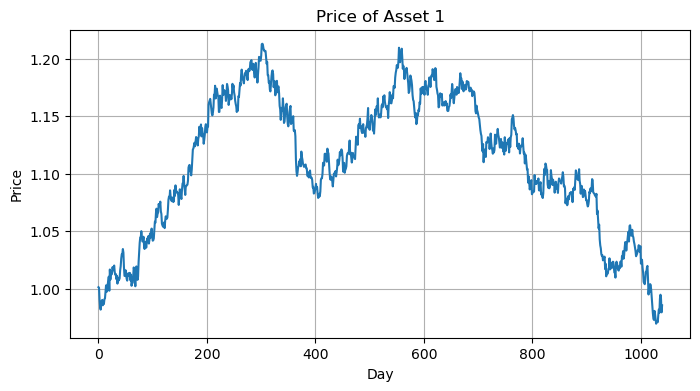

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(train_daily_prices.index, train_daily_prices['Asset_1'])
plt.title("Price of Asset 1")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()

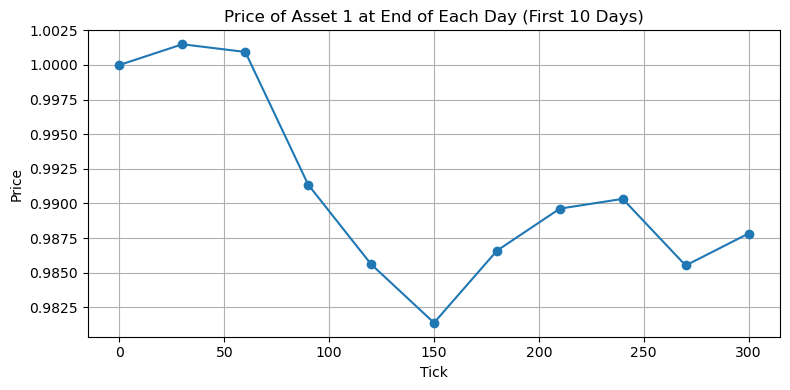

In [31]:
tick_indices = list(range(0, 301, 30))
asset_1_prices = data.iloc[tick_indices]['Asset_1']

# Plot
plt.figure(figsize=(8, 4))
plt.plot(tick_indices, asset_1_prices, marker='o')
plt.title("Price of Asset 1 at End of Each Day (First 10 Days)")
plt.xlabel("Tick")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

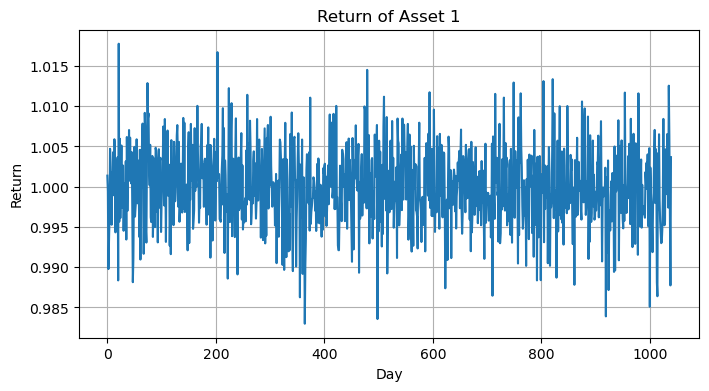

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(daily_returns.index, daily_returns['Asset_1_daily_ret'])
plt.title("Return of Asset 1")
plt.xlabel("Day")
plt.ylabel("Return")
plt.grid(True)
plt.show()

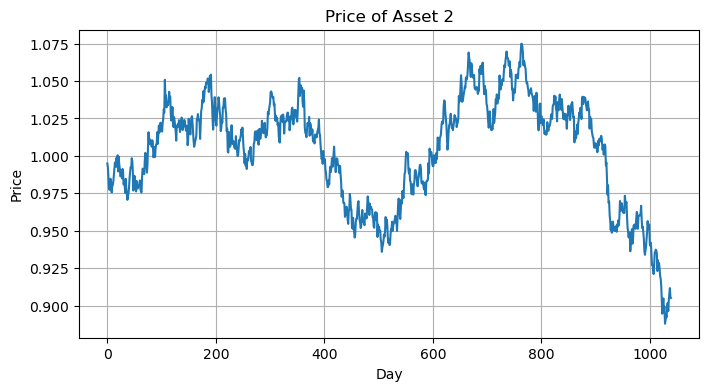

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(train_daily_prices.index, train_daily_prices['Asset_2'])
plt.title("Price of Asset 2")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()

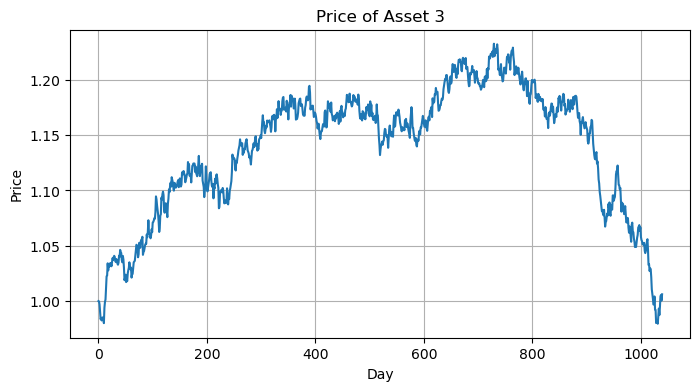

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(train_daily_prices.index, train_daily_prices['Asset_3'])
plt.title("Price of Asset 3")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()

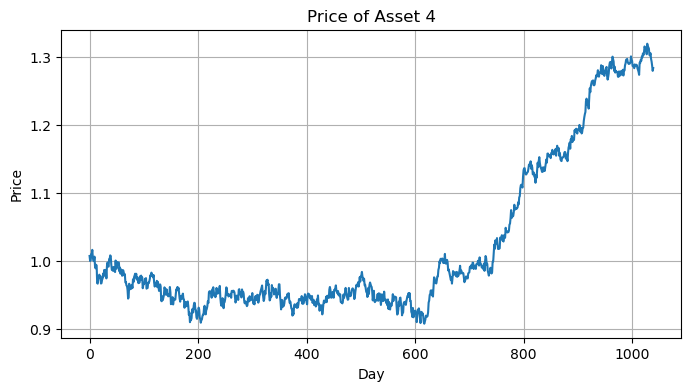

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(train_daily_prices.index, train_daily_prices['Asset_4'])
plt.title("Price of Asset 4")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()

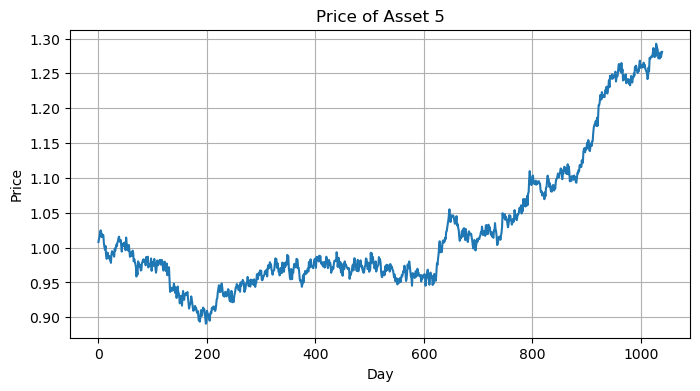

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(train_daily_prices.index, train_daily_prices['Asset_5'])
plt.title("Price of Asset 5")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()

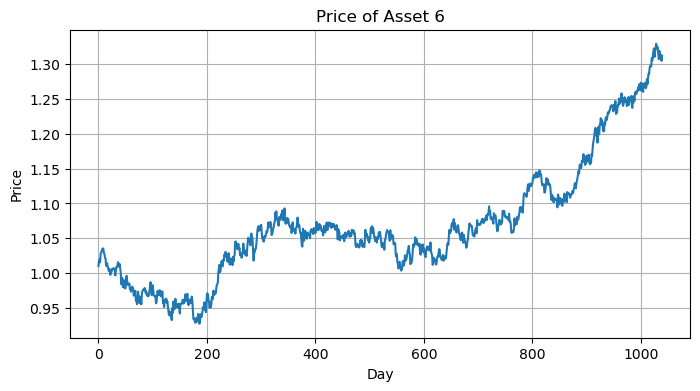

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(train_daily_prices.index, train_daily_prices['Asset_6'])
plt.title("Price of Asset 6")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()

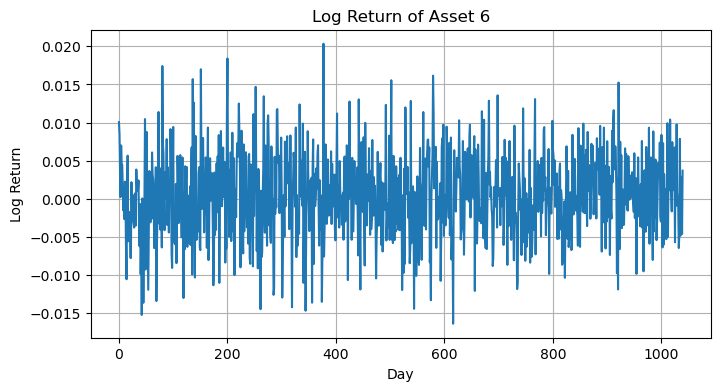

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(daily_log_returns.index, daily_log_returns['Asset_6_daily_log_ret'])
plt.title("Log Return of Asset 6")
plt.xlabel("Day")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()